<a href="https://colab.research.google.com/github/KiruruKamau/Data-Science-Portfolio-Projects/blob/main/Copy_of_Tesla_Stock_Price_Prediction_using_a_recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from datetime import datetime as dt
import yfinance as yf
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
symbol = input("Enter company Ticker symbol")

In [ ]:
# initialize parameters
start_date = dt(2012, 1, 1)
end_date = dt(2020, 1, 1)

In [ ]:
#Get the data
data = yf.download(symbol, start=start_date, end= end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [ ]:
#Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
prediction_days = 60

In [ ]:
X_train = []
y_train = []

In [ ]:
for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0 ])
  y_train.append(scaled_data[x, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))#Prediction of the next price

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

61/61 [==============================] - 4s 71ms/step - loss: 0.0040
Epoch 7/25
61/61 [==============================] - 5s 79ms/step - loss: 0.0042
Epoch 8/25
61/61 [==============================] - 4s 63ms/step - loss: 0.0037
Epoch 9/25
61/61 [==============================] - 5s 75ms/step - loss: 0.0038
Epoch 10/25
61/61 [==============================] - 6s 105ms/step - loss: 0.0034
Epoch 11/25
61/61 [==============================] - 4s 63ms/step - loss: 0.0034
Epoch 12/25
61/61 [==============================] - 7s 111ms/step - loss: 0.0031
Epoch 13/25
61/61 [==============================] - 4s 63ms/step - loss: 0.0033
Epoch 14/25
61/61 [==============================] - 5s 79ms/step - loss: 0.0033
Epoch 15/25
61/61 [==============================] - 7s 117ms/step - loss: 0.0030
Epoch 16/25
61/61 [==============================] - 4s 64ms/step - loss: 0.0029
Epoch 17/25
61/61 [==============================] - 4s 69ms/step - loss: 0.0029
Epoch 18/25
61/61 [=====================

In [ ]:
#Load test data
test_start = dt(2020, 1, 1)
test_end = dt.now()

In [ ]:
test_data = yf.download(symbol, start=test_start, end=test_end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [ ]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:]
model_inputs = model_inputs.values.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
#Make predictions on test_data
X_test = []
for x in range(prediction_days, len(model_inputs)):
  X_test.append(model_inputs[x-prediction_days:x,0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

32/32 [==============================] - 1s 24ms/step


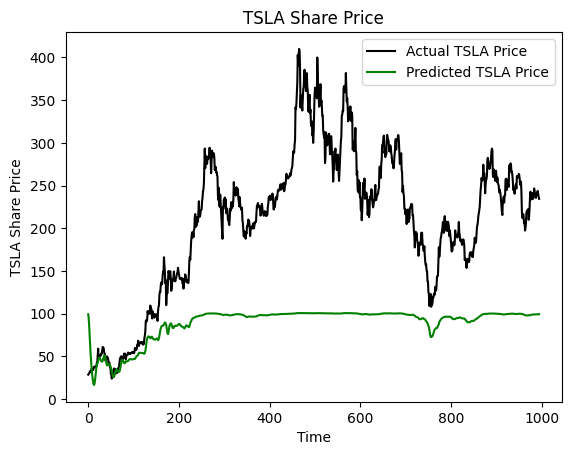

In [ ]:
#Plot the test predictions
plt.plot(actual_prices, color="black", label=f"Actual {symbol} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {symbol} Price")
plt.title(f"{symbol} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{symbol} Share Price')
plt.legend()
plt.show()